## Topic 5. Neural Networks
## Boltzmann Machines, Multi-layer Perceptrons, Competitive Learning, and Spiking Neural Networks 


In [2]:
# We start by importing the python libraries required to solve the problems

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import scipy as sp
import pandas as pd

# From sklearn we will use the implementations of the Multi-layer perceptron, and the Boltzmann Machines
from sklearn import cluster
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import binarize
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets.mldata import fetch_mldata

# We will also use different metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics


# We will also discuss about on the neupy implementation of RBM and the Somoclu 
# implementation of Self-Organizing-Maps
from neupy import algorithms
import somoclu


from IPython.display import display
from IPython.display import Image



## Restricted Boltzmann Machines (RBM)

Run the following cell to produce an image of the an RBM architecture.

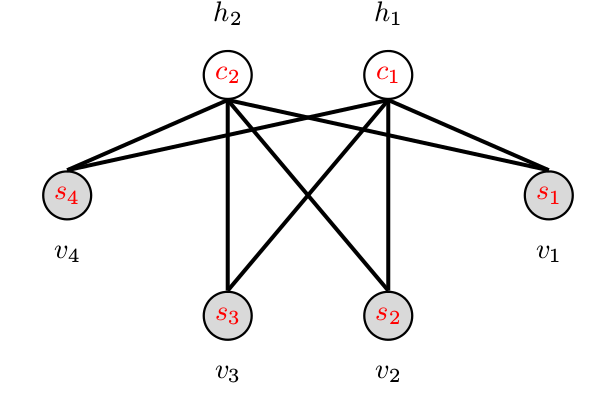

In [3]:
i = Image(filename='images/RBM_Example.png')
i

This RBM has 6 nodes. Four visible units (shown in gray) that receive the inputs and two hidden units (shown in white). Each visible unit is connected to all hidden units, and each hidden unit is connected to all visible units. 
Remind that RBMs are used for unsupervised machine learning problems. No information about the class is used to learn an RBM. 

The RBM is one of the most important neural networks with a set of relevant characteristics:
    
1) It has an energy model and connects with pioneering work on the Hopfield Network.

2) It is also a probabilistic graphical model that represents and exploits conditional probabilistic relationships between the variables.

3) It contains a set of latent variables that can represent higher order patterns present in the data.

4) It is the building block of a number of Deep Neural Networks. 

We define an sklearn object that represents an RBM with 100 hidden neurons. The number of visible units will depend on the data used to train the network.

In [4]:
sk_rbm = BernoulliRBM(n_components=100, verbose=True, learning_rate=0.1, n_iter=50)

To show the behavior of the RBM,  we will use the MNIST dataset. This is perhaps the dataset most employed to evaluate and extend Deep Neural Networks. 
The MNIST dataset is a database of handwritten digits. It contains images of 10 digits. Therefore it can be used as a model of a 10-class supervised classification problem. 

You could get more details about that dataset here: http://yann.lecun.com/exdb/mnist/


Run the following cell to read all the data (60000 instances).

In [5]:
mnist = fetch_mldata("MNIST original")

X_mnist, y_mnist = mnist.data / 255., mnist.target


We show one example of the images included in the dataset. Notice that in our dataset, the images of 28x28 are transformed to vectors of 784 variables.

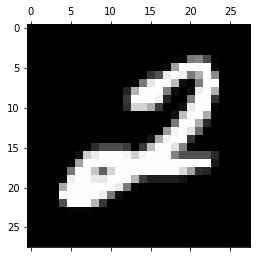

In [6]:
plt.matshow(X_mnist[16000].reshape(28,28), cmap=plt.cm.gray,)
plt.show()

To see the variability of training data for a single digit you can follow the following link: http://www.cs.nyu.edu/~roweis/data/mnist_train8.jpg

Before learning the RBM, we select a subset of the training data. A decimation_factor variable is used. This means that for each group of 'decimation_factor' vectors, we will take only one.

We also binarize the dataset since the RBM has binary visible and hidden units.

In [7]:
decimation_factor = 50
data_mnist = binarize(X_mnist[::decimation_factor,:])

Finally, the RBM is learned

In [8]:
sk_rbm.fit(data_mnist)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -247.43, time = 0.18s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -207.94, time = 0.15s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -188.84, time = 0.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -197.11, time = 0.15s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -178.75, time = 0.16s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -149.15, time = 0.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -179.84, time = 0.15s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -152.34, time = 0.15s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -166.27, time = 0.15s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -187.47, time = 0.14s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -152.09, time = 0.15s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -148.11, time = 0.15s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -155.62, time = 0.15s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -151.48, time = 0.15s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=50,
       random_state=None, verbose=True)

## Exercise 1


- Calculate the number of parameters (weights) used by the sk_rbm network that we have just learned


As other ML algorithms, the learning method used by the RBM tries to learn a set of parameters (weights) that maximizes the quality of the model. Often, the quality of a model is computed by maximizing the probability it gives to the training instances using the log-likelihood, i.e., 
$\sum_i log(\hat{p}(x^i))$ where $\hat{p}(x)$ is the probability given by the network to an input vector.

However, in the case of the RBM, it is not possible to compute the log-likelihood due to the difficulty of computing the partition function. Therefore, instead of maximizing the likelihood, the pseudo-likelihood is used. The pseudo-likelihood is the sum of the log-probabilities of each visible unit  x_i, conditioned on the state of all other bits. 

Notice that the learning algorithm used by the RBM increases the value of the pseudo-likelihood as it progresses

In [11]:
sk_rbm.components_.shape

(100, 784)

## Exercise 2

The following cell computes:
    
    a) The pseudo-likelihood of one solution from the training set (calculated ten times)
    
    b) The pseudo-likelihood of ten random solutions

These values are shown in a figure.

- Explain the differences of the data shown in the figure. 


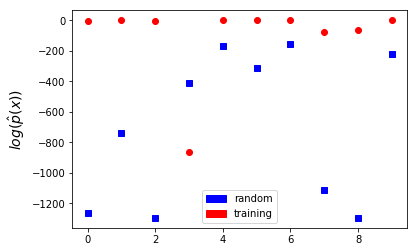

In [12]:
npoints = 10
score_training = np.zeros((npoints))
score_random = np.zeros((npoints))

for i in range(10):
   training_sol = data_mnist[0].reshape(1, -1);
   score_training[i]  = sk_rbm.score_samples(training_sol.reshape(1, -1))
   random_sol = np.random.randint(2, size=28*28)
   score_random[i]  = sk_rbm.score_samples(random_sol.reshape(1, -1))

fsize = 14
fig = plt.figure()   
plt.plot(score_training,'ro', lw=4)
plt.plot(score_random,'bs', lw=4) 
blue_patch = mpatches.Patch(color='blue', label='random')
red_patch = mpatches.Patch(color='red', label='training')
plt.legend(handles=[blue_patch,red_patch])
plt.ylabel(r'$log(\hat{p}(x))$', fontsize=fsize)
plt.show()    

    

## Analysis of the RBM latent variables

As mentioned before, the RMB we have learned has 100 latent variables. Now we show the weights learned by these neurons. Notice that since each hidden unit is connected to the 748 units, we can reshape the weights, for each of the hidden units as 28x28 matrices. These matrices are shown as images. There are 100 images, one for each weight vector. 


What is relevant is that the weights capture characteristic patterns of the data.


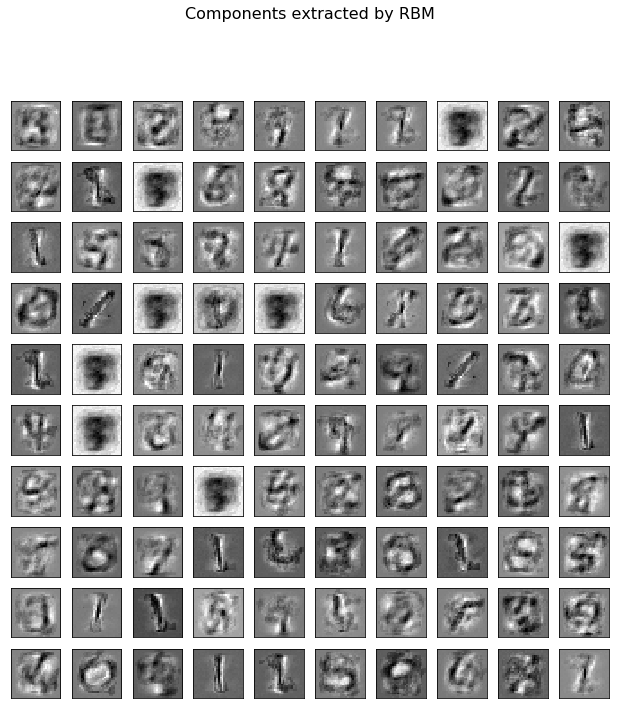

In [13]:
plt.figure(figsize=(10,10))
for i, comp in enumerate(sk_rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r,
               interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

## Exercise 3

- Use the fashion-mnist dataset to learn an RBM with 25 hidden units. 
- Display the weights learned by the hidden neurons. 

 Run the following cell to read a subset of the fashion-mnist dataset and check the characteristics of the dataset here: https://github.com/zalandoresearch/fashion-mnist



In [67]:
#from keras.datasets import fashion_mnist
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion')
nsamples = 1200
X_fashion, y_fashion = data.train.next_batch(nsamples)
X_fashion = X_fashion / X_fashion.size

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [59]:
sk_rbm = BernoulliRBM(n_components=100, verbose=True, learning_rate=0.1, n_iter=50)

In [60]:
data_mnist_fashion = binarize(X_fashion)

In [61]:
sk_rbm.fit(data_mnist_fashion)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -215.06, time = 0.14s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -198.83, time = 0.14s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -170.33, time = 0.18s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -150.91, time = 0.13s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -142.90, time = 0.13s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -149.60, time = 0.12s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -126.49, time = 0.13s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -131.61, time = 0.12s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -121.13, time = 0.14s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -126.19, time = 0.13s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -152.14, time = 0.14s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -146.39, time = 0.12s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -115.84, time = 0.14s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -136.87, time = 0.12s
[BernoulliRBM] 

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=50,
       random_state=None, verbose=True)

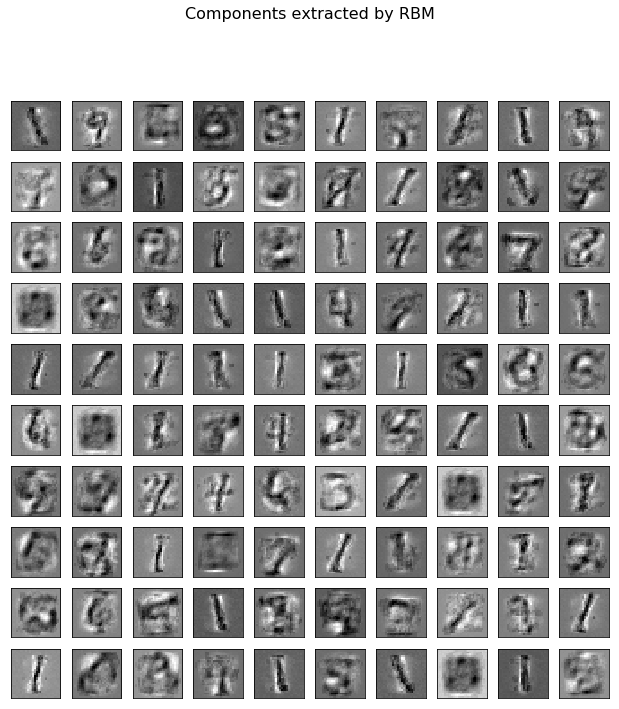

In [62]:
plt.figure(figsize=(10,10))
for i, comp in enumerate(sk_rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.suptitle('Components extracted by RBM', fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
plt.show()

## Note
Given its importance the RBM model is implemented using other packages, e.g., Keras and neupy. The following lines show how to use the neupy functionality

In [91]:
rbm = algorithms.RBM(n_visible=28*28, n_hidden=10,verbose=True)
#rbm.train(data, epochs=10)
#hidden_states = rbm.visible_to_hidden(data)
#hidden_states.round(2)
#hidden_states.shape

# Multi-layer perceptron

The multilayer perceptron is a neural network that may have one or more HIDDEN layers comprised by perceptron. It has a number of particular characteristics:

1) It is used for Supervised Machine Learning.

2) Differently to the Perceptron model, it can approximate non-linear functions.

3) It can be used for regression and classification. 

4) It can simultaneously approximate two or more target variables. 

Take some time to check the structure of a multi-layer perceptron in the following image.

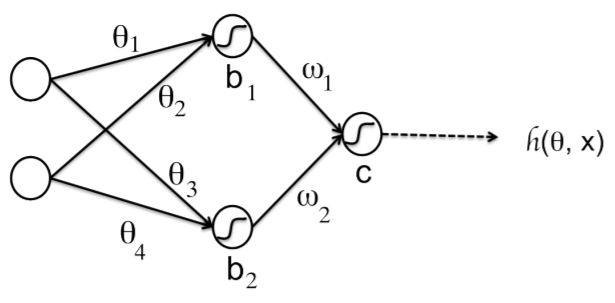

In [185]:
i = Image(filename='images/MLP_Networks_Parameters.png')
i

We will use the multi-layer Perceptron for classification and regression. For classification, we will use the fashion_mnist dataset. 

We read the fashion dataset and select training and test sets. 

In [73]:
data = input_data.read_data_sets('data/fashion')
nsamples = 5000
X_fashion_train, y_fashion_train = data.train.next_batch(nsamples)
X_fashion_test, y_fashion_test = data.test.next_batch(nsamples)
fashion_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']


Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


A multi-layer perceptron classifier is defined. It has only one hidden layer of 50 neurons. 

In [74]:
 mpl_clf = MLPClassifier(hidden_layer_sizes=(50), random_state=1)

The network learns its parameters using the Adam optimization method (by default, this is the optimizer used) but this is a parameter of the method. 

In [75]:
 mpl_clf.fit(X_fashion_train,y_fashion_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

## Exercise 4

- Determine how many parameters has learned this multi-layer perceptron network


In [79]:
print(mpl_clf.n_layers_)
print(mpl_clf.n_outputs_)

3
10


The model is used to compute the predictions on the test data. 

In [76]:
mpl_fashion_prediction = mpl_clf.predict(X_fashion_test)

The confusion matrix is computed.

In [77]:
metrics.confusion_matrix(y_fashion_test, mpl_fashion_prediction, labels=range(10), sample_weight=None)

array([[498,   0,   0,   0,   1,   7,   3,   0,   1,   2],
       [  0, 572,   2,   1,   0,   0,   2,   2,   4,   0],
       [  5,   3, 474,   7,   6,   0,   7,   5,  10,   1],
       [  3,   0,  15, 455,   1,   8,   0,   2,  12,   6],
       [  0,   0,   2,   0, 448,   0,   7,   2,   2,  16],
       [  6,   0,   6,  10,   2, 374,  10,   1,  14,   2],
       [  7,   3,   1,   0,   5,   3, 449,   0,   4,   0],
       [  0,   5,  14,  10,   2,   0,   0, 486,   1,   7],
       [  1,   1,   3,   2,   5,   7,   6,   5, 448,   9],
       [  3,   4,   0,   8,  17,   6,   0,   7,   3, 451]])

## Exercise 5

- Compute the accuracy of the prediction

## Exercise 6

The latent variables produced by an RBM can be used as extracted features for learning a supervised classifer. For this purpose the sklearn library provides a function transform(): http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.BernoulliRBM.html


- Create a pipeline classifier for the fashion-mnist classification problem that first creates 60 features (corresponding to latent variables) of the RBM and then apply a multi-layer perceptron with one hidden layer of 50 neurons. 

- Compute the accuracy of this pipeline.


Reminder: Remind that the RBM assumes binary units. 


# Multi-layer regressor

As previously mentioned, the multi-layer perceptron can be also used for regression. The network architecture is the same except that the last activation functions are identity functions (they output continuous values instead of 0,1, or probabilities). 

To test multi-layer regressor we will use the "Appliances energy prediction Data Set" from the UCI database: https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

This dataset contains data about the electricity consumption of a house during a long time period. Environmental variables are measured in all the rooms of the house. Our goal will be to predict the energy used by the Appliances, AND the energy use of light fixtures. Therefore, we want to SIMULTANEOSLY learn to predict TWO variables. For this purpose we will use a multi-layer regression model.

We read the dataset.

In [217]:
# Stores the data as a dataframe of Pandas
df = pd.read_csv('energydata_complete_cleaned.csv',sep=',')
print(df)

                      date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
5      2016-01-11 17:50:00          50      40  19.890000  46.026667   
6      2016-01-11 18:00:00          60      50  19.890000  45.766667   
7      2016-01-11 18:10:00          60      50  19.856667  45.560000   
8      2016-01-11 18:20:00          60      40  19.790000  45.597500   
9      2016-01-11 18:30:00          70      40  19.856667  46.090000   
10     2016-01-11 18:40:00         230      70  19.926667  45.863333   
11     2016-01-11 18:50:00         580      60  20.066667  46.396667   
12     2016-01-11 19:00:00         430      50  20.133333  48.00

## Exercise 7 

Create a Multi-layer Regressor model for predicting  the "Appliances" and "lights" variables. The neural network should have 2 hidden layers, the first of 50 neurons, and the second of 20. 

- Use the mean squared error to compute the quality of the prediction.


Suggestions. See: 

http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error

and consult the Pandas library help is required for extracting a subsect of columns from the matrix.



# Competitive Learning

 We will consider the use of Neural Vector Quantization. Therefore, we start by illustrating how Image Quantization can be implemented using a clustering algorithm like kmeans. For this introduction we use a modified version of the example presented here: http://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html


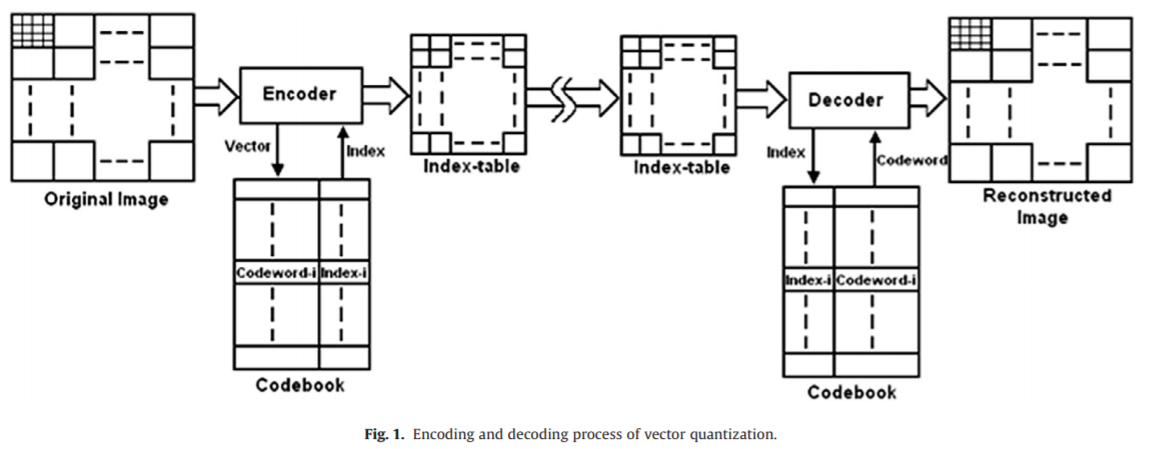

In [92]:
i = Image(filename='images/Image_Quantization.png')
i


The figure above shows a schematic representation of Image Quantization. The goal is to obtain a compressed representation of an image. To do this, a Codebook is created where a number of Codewords or Codevectors are defined together with an index. The Codebook works similarly to a hash table. For each pixel in the image, we look for the corresponding Codeword in the Codebook and USE THE INDEX of the Codeword to represent the pixel. We assume that the number of indices is much smaller than the possible values of a pixel. For example, if we need 8 bits to represent the 256 values of a pixel, we only need 3 bits to represent 8 indices.


The storing cost of the Quantization Mechanism is the number of pixels multiplied by the bits needed to represent an index plus the storing cost of the Codebook.


To decode an image, we simply get the set of indices and recover the corresponding Codewords in the Codebook. Obviously, the selection of good Codewords determines the quality of the Vector Quantization algorithm. 

In the following code, the kmeans algorithm is used to find the Codewords of an image.

We start by reading an image, the "ascent" image. 

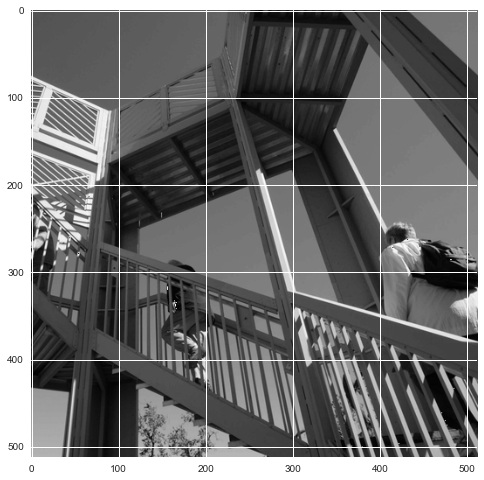

In [103]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# Modified by Roberto Santana
# License: BSD 3 clause

try:  # SciPy >= 0.16 have ascent in misc
    from scipy.misc import ascent  
    ascent = sp.misc.ascent()
except ImportError:
    ascent = sp.ascent()



vmin = ascent.min()
vmax = ascent.max()

# original ascent
plt.figure(1, figsize=(8, 8))
plt.imshow(ascent, cmap=plt.cm.gray, vmin=vmin, vmax=256)
    

## Encoding phase

Using kmeans we cluster ALL THE PIXELS of the image in FIVE CLUSTERs.

In [95]:
n_clusters = 5
np.random.seed(0)

X = ascent.reshape((-1, 1))  # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=n_clusters, n_init=4)
k_means.fit(X)


The variable values contains the centroids of the five clusters (the five Codewords) and labels have for each pixel, its corresponding index. We print all Codevectors and some of the pixel indices.

In [98]:
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
print(values)
print(labels[:20000:1000])

[ 127.33193545   62.51254379  199.84608461   91.34660051   28.48289798]
[3 0 0 0 1 1 1 4 4 4 4 4 3 3 3 3 3 3 3 3]


## Decoding phase

Using the Codebook (values) and the labels, we reconstruct the image.

In [99]:
# create an array from labels and values
ascent_compressed = np.choose(labels, values)
ascent_compressed.shape = ascent.shape

Finally, we print the original image and the one that was quantized. Notice that although there is some deterioration of the image quality, it can be recognized and many details are not lost.

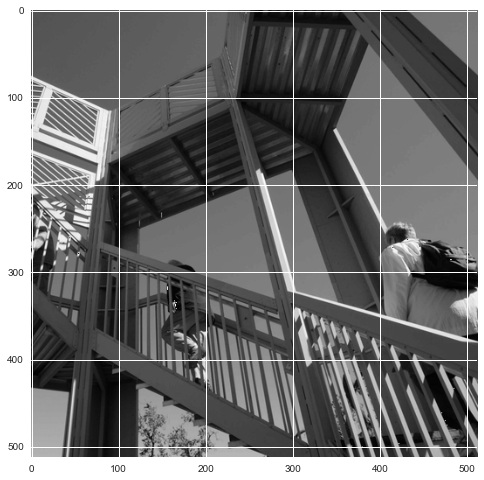

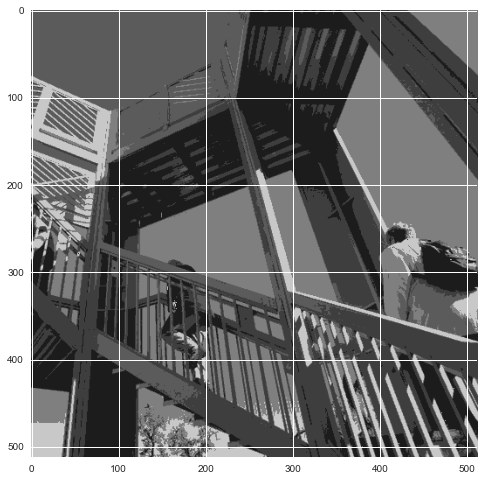

In [104]:
vmin = ascent.min()
vmax = ascent.max()

# original ascent
plt.figure(1, figsize=(8, 8))
plt.imshow(ascent, cmap=plt.cm.gray, vmin=vmin, vmax=256)

# compressed ascent
plt.figure(2, figsize=(8, 8))
plt.imshow(ascent_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)


plt.show()

## Neural quantization

Now, we will use a Vector Quantization approach to learn a quantization of the image. Vector quantization is Competitive Learning approach where k neurons compete for representing the input data. In the network topology, each of the k neurons is connected to all the inputs by a weight vector. 

Every time an input is presented to the network, all neurons compute their distance to the input, and the neuron that is the closest neuron (Best Matching Unit) is selected. This is call the winner, and in this approach the "winner-takes-all", that means that this neuron and only it will update its weight getting closer to the input. 


The following code implements the Vector Quantization approach for finding Codewords. In this application, the neurons will represent the Codebook. The index of each neuron is the index of the Codeword, and the vector of weights is the Codeword. 


Read the comments to the code and execute it.

In [121]:
from scipy.spatial import distance


# The Codebook contains n_codevectors, each of n_features
# All Codewords are randomly generated
def Init_Code_Vectors(n_codevectors,n_features):
    CodeBook = np.random.rand(n_codevectors,n_features)
    return CodeBook


# The Best Matching Unit (BMU) is the Codeword that is closest
# to the instance according to the Euclidean distance
# The algorithm computes the distances for all Codevectors
# and outputs the index, in the Codebook of the BMU
def Find_Best_Matching_Unit(instance,CodeBook):
    n_codevectors = CodeBook.shape[0]
    dist = np.zeros((n_codevectors))
    for i in range(n_codevectors):
        dist[i] = distance.euclidean(instance,CodeBook[i,:])
    BMU = np.argmin(dist)
    return BMU


# This is the most important step of the algorithm
# The weights of the BMU are updated. 
# This is done by moving the BMU in the direction of of the instance
# Notice the similarity with the learning rule used to learn the Perceptron
# as studied in previous lessons
def Update_BMU(BMU_Weights,instance,learning_rate):
    delta_W = (instance - BMU_Weights)
    new_BMU_Weights = BMU_Weights + learning_rate*delta_W
    return new_BMU_Weights


# This is the main implementation of the Vector Quantization algorithm
# It receives a set of instances (training data), the number of CodeVectors
# that we want in the Codebook (the number of neurons). 
# The number of iterations of the algorithm (in each iterations all the instances
# are given to the network as input) and the learning_rate
def Vector_Quantization(instances,n_codevectors,n_epochs,learning_rate):
    n_instances, n_features = instances.shape
    # The Codebook is randomly initialized
    CodeBook = Init_Code_Vectors(n_codevectors,n_features)
    
    # We plot the location of the neurons (defined by their weights)
    Plot_Instances_and_Prototypes(instances,CodeBook)
    Index = np.zeros((n_instances))
    
    # In each iteration, for a given instance, first the BMU is found.
    # That way we obtain the index for that particular instance
    # Then the weight of the BMU is updated
    # At each step we plot the current location of the neurons
    for i in range(n_epochs):
        for j in range(n_instances):  
            BMU_index =  Find_Best_Matching_Unit(instances[j,:],CodeBook)  
            Index[j] = BMU_index
            CodeBook[BMU_index,:]  = Update_BMU(CodeBook[BMU_index,:],instances[j,:],learning_rate)
             
        Plot_Instances_and_Prototypes(instances,CodeBook)
       
    return CodeBook, Index

# Plot the instances as green 'x' and the neurons as blue 'o'
def Plot_Instances_and_Prototypes(inst,prot):
    #fig = plt.figure()
    plt.plot(inst[:,0],inst[:,1],'bs', lw=4)
    plt.plot(prot[:,0],prot[:,1],'ro', lw=4)
    plt.show()



To test our algorithm, we create a set of 20 2-dimensional vectors located in the corners of a square.
Then the Vector Quantization algorithm is invoked to find the Codevector (centers of the clusters) of these data.
Execute the following cell and observe the figures that are produced. 

In [ ]:
n_prototypes = 5
n_features = 2
n_epochs = 6
learning_rate = 0.3

npoints = 5
left_up =   [-2, 2]+ 2*np.random.rand(npoints,2)
left_down = [-2,-2]+ 2*np.random.rand(npoints,2)
right_up =   [2, 2]+ 2*np.random.rand(npoints,2)
right_down = [2,-2]+ 2*np.random.rand(npoints,2)

instances = np.concatenate([left_up,left_down,right_up,right_down])

CodeBook, Index = Vector_Quantization(instances,n_prototypes,n_epochs,learning_rate)
print(CodeBook,Index)




## Exercise 8

- Use function Vector_Quantization to find the CodeBook of image ascent that we have used before.
- Show the image reconstruction obtained with the Neural CodeBook.


Suggestions:
    - The only modification required to the program Vector_Quantization is to COMMENT the calls to the  Plot_Instances_and_Prototypes() function.  The exercise consists in finding the right input parameters for this function.
    -  Select a small number of epochs (No more than 10)


In [ ]:
CodeBook, Index = Vector_Quantization()